In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [5]:
data.shape

(12684, 26)

In [6]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
#showing null values by %
print('Is there any missing value present or not?',data.isnull().values.any())
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Is there any missing value present or not? True


,missing_count,missing_percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


In [9]:
# Identify columns with null values
columns_with_null = data.columns[data.isnull().any()]

# Drop columns with null values
data1 = data.drop(columns=columns_with_null)

# Now, your DataFrame (df) has columns with null values dropped
data1.shape

(12684, 20)

In [10]:
#Dropping column "toCoupon_GEQ5min" as there are no variance.
data1.drop(columns=["toCoupon_GEQ5min"],inplace=True)
data1.shape

(12684, 19)

In [11]:
# Remove duplicates
data1 = data1.drop_duplicates(keep='last')
print(data1.shape)

(12500, 19)


In [12]:
#Check if there are any remaining null values
data1.isnull().sum()

destination          0
passanger            0
weather              0
temperature          0
time                 0
coupon               0
expiration           0
gender               0
age                  0
maritalStatus        0
has_children         0
education            0
occupation           0
income               0
toCoupon_GEQ15min    0
toCoupon_GEQ25min    0
direction_same       0
direction_opp        0
Y                    0
dtype: int64

In [13]:
#describing the dataset
data1.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000
mean,63.218000,0.415680,0.559440,0.116000,0.216240,0.783760,0.566240
std,19.184471,0.492859,0.496474,0.320238,0.411696,0.411696,0.495613
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 0 to 12683
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   destination        12500 non-null  object
 1   passanger          12500 non-null  object
 2   weather            12500 non-null  object
 3   temperature        12500 non-null  int64 
 4   time               12500 non-null  object
 5   coupon             12500 non-null  object
 6   expiration         12500 non-null  object
 7   gender             12500 non-null  object
 8   age                12500 non-null  object
 9   maritalStatus      12500 non-null  object
 10  has_children       12500 non-null  int64 
 11  education          12500 non-null  object
 12  occupation         12500 non-null  object
 13  income             12500 non-null  object
 14  toCoupon_GEQ15min  12500 non-null  int64 
 15  toCoupon_GEQ25min  12500 non-null  int64 
 16  direction_same     12500 non-null  int64

In [15]:
# correlation matrix
data1.corr()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.017564,-0.157865,-0.226154,0.098377,-0.098377,0.058338
has_children,-0.017564,1.000000,0.080483,-0.011018,-0.032168,0.032168,-0.043622
toCoupon_GEQ15min,-0.157865,0.080483,1.000000,0.321461,-0.302247,0.302247,-0.082496
toCoupon_GEQ25min,-0.226154,-0.011018,0.321461,1.000000,-0.190274,0.190274,-0.107900
direction_same,0.098377,-0.032168,-0.302247,-0.190274,1.000000,-1.000000,0.015078
direction_opp,-0.098377,0.032168,0.302247,0.190274,-1.000000,1.000000,-0.015078
Y,0.058338,-0.043622,-0.082496,-0.107900,0.015078,-0.015078,1.000000


In [16]:
 # Identify categorical columns with null values
categorical_columns = data1.dtypes[data1.dtypes == "object"].index


# One-hot encode categorical columns
data2 = pd.get_dummies(data1, columns=categorical_columns)
data2.shape

(12500, 84)

We are performing dimensionality reduction using LASO regression's results

In [97]:
#LASO
# With lasso regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

class LogisticRegression:
    def __init__(self, X,y, learningrate, max_iterations, epsilon=0.0005, remove_index=None,reg_lambda=0.1,method="Lasso"):
        self.X=X
        self.y=y
        self.learningrate = learningrate
        self.max_iterations = max_iterations
        self.epsilon = epsilon
        self.reg_lambda=reg_lambda
        self.remove_index = remove_index
        self.theta = None
        self.method=method

    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def normalize_train(self,X):
        mean=np.mean(X,axis=0)
        std=np.std(X,axis=0)
        X=(X-mean)/std
        X=self.add_X0(X)
        return X,mean,std
    def normalize_test(self,X,mean,std):
        X=(X-mean)/std
        X=self.add_X0(X)
        return X

    def sigmoid(self, X):

        z = X.dot(self.theta)

        # Compute the sigmoid function
        sigmoid_result = 1 / (1 + np.exp(-z))

        return sigmoid_result

    def cost_function(self, X, y):
        p_yi = self.sigmoid(X)
        cost = (1 / X.shape[0]) * (y.dot(np.log(p_yi)) + (1 - y).dot(np.log(1 - p_yi)))
        return -cost.sum()

    def cost_derivative_1(self, X, y):
        sig = self.sigmoid(X).reshape(-1)
        gradient = (sig - y).dot(X)+self.reg_lambda*np.ones([X.shape[1], 1]).reshape(-1)
        return gradient
    def cost_derivative_2(self, X, y):
        sig = self.sigmoid(X).reshape(-1)
        gradient = (sig - y).dot(X)+self.reg_lambda*self.theta
        return gradient

    def gradient_descent(self, X, y):
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iterations), colour='red'):
            if self.method=="Lasso":
                self.theta -= self.learningrate * self.cost_derivative_1(X, y)
            else:
                self.theta -= self.learningrate * self.cost_derivative_2(X, y)
            error = self.cost_function(X, y)
            errors.append(error)
            if np.all(np.abs(prev_error - error) < self.epsilon):
                print("stopped learning")
                break
            prev_error = error


    def fit(self):
        X,mean,std=self.normalize_train(self.X)
        if self.remove_index is not None:
            X_train = np.delete(X, self.remove_index, axis=0)
            y_train = np.delete(self.y, self.remove_index)
        else:
            X_train=X
            y_train = self.y
        self.theta = np.ones(len(X_train[0]))
        self.gradient_descent(X_train, y_train)

    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost', title='cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow=True)
        plt.show()

    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X[:, 0], self.X[:, 1],
                     self.X[:, 0:3].dot(self.theta[:3]),
                     c=self.y[:], cmap='viridis', s=100)

        ax.set_xlim3d(-1, 1)
        ax.set_ylim3d(-1, 1)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation=0)

    def sigmoid_1(self, X):


        # Compute the sigmoid function
        sigmoid_result = 1 / (1 + np.exp(-X))

        return sigmoid_result
        
    def scatter_plot(self):
        # evenly sampled points
        x_min, x_max = -1, 1
        y_min, y_max = -1, 1
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[np.column_stack([np.ones([62500,1])]).ravel(),xx.ravel(), yy.ravel()]
        probs = self.sigmoid_1(grid.dot(self.theta[:3])).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14, 12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(self.X[:, 0], self.X[:, 1],
                   c=self.y[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        plt.show()

    def plot_3d(self):
        # evenly sampled points
        x_min, x_max = -1, 1
        y_min, y_max = -1, 1
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[np.column_stack([np.ones([62500,1])]).ravel(),xx.ravel(), yy.ravel()]
        probs = self.sigmoid_1(grid.dot(self.theta[:3])).reshape(xx.shape)
        fig = plt.figure(figsize=(14, 12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X[:, 0], self.X[:, 1],
                     c=self.y[:], s=50,
                     cmap="RdBu", vmin=-.2, vmax=1.2,
                     edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

In [77]:
from dataclasses import dataclass
from sklearn.model_selection import train_test_split

In [93]:
@dataclass
class K_fold_validation:
    k:int=3
    best_thetas = []
    def __post_init__(self):
        self.X,self.y=self.read_data()

    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

    def normalize_train(self,X):
        mean=np.mean(X,axis=0)
        std=np.std(X,axis=0)
        X=(X-mean)/std
        X=self.add_X0(X)
        return X,mean,std
    def normalize_test(self,X,mean,std):
        X=(X-mean)/std
        X=self.add_X0(X)
        return X

    def read_data(self):
        train_df = data2

        X = train_df.drop(columns=['Y']).values
        y = train_df['Y'].values

        return X,y

    def initiate_sequence(self):
        lambda_errors=[];
        lambda_thetas=[]
        best_lambda=0
        self.best_thetas=[]
        for l in np.arange(0,1,0.25):
            k_errors=[];
            k_thetas=[]
            for k in np.arange(1,self.k,1):
                X_train,X_test,y_train,y_test=self.select_train_test_datas(self.X,self.y,k)
                X_to_send,mean,std=self.normalize_train(X_train)
                log_reg = LogisticRegression(X=X_train,method="Lasso",y=y_train,learningrate=0.001, max_iterations=1000, epsilon=0.0005,reg_lambda=l)
                log_reg.fit()
                k_thetas.append(log_reg.theta)
                X_test=self.normalize_test(X_test,mean,std)
                k_errors.append(log_reg.cost_function(X_test,y_test))
            lambda_errors.append(np.mean(k_errors))
            lambda_thetas.append(np.mean(k_thetas,axis=0))
        for i,j in enumerate(lambda_errors):
            if j==np.min(lambda_errors):
                best_lambda=np.arange(0,1,0.25)[i]
                self.best_thetas=lambda_thetas[i]
        print(best_lambda)
        print(np.min(lambda_errors))
        print(self.best_thetas)


    def select_train_test_datas(self,X,y,k):
        split_ranges=np.arange(0,len(X),len(X)/self.k)
        X_test=[]
        X_train=[]
        y_test=[]
        y_train=[]
        if k+1==self.k:
            X_test=X[int(split_ranges[k]):]
            X_train=X[:int(split_ranges[k])]
            y_test=y[int(split_ranges[k]):]
            y_train=y[:int(split_ranges[k])]
        else:
            X_test=X[int(split_ranges[k]):int(split_ranges[k+1])]
            y_test=y[int(split_ranges[k]):int(split_ranges[k+1])]
            for x in np.arange(0,len(X),1):
                if x >=int(split_ranges[k]) or x<=int(split_ranges[k+1]):
                    X_train.append(X[x])
                    y_train.append(y[x])
        return np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)

In [20]:
valid = K_fold_validation(k=3)

In [21]:
valid.initiate_sequence()

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Uday Sujith\AppData\Local\Temp\ipykernel_36240\3207941135.py:46: RuntimeWarning: divide by zero encountered in log
  cost = (1 / X.shape[0]) * (y.dot(np.log(p_yi)) + (1 - y).dot(np.log(1 - p_yi)))
100%|██████████| 1000/1000 [00:00<00:00, 2021.53it/s]

0.75
3.514598571528533
[ 2.83854504e+00  8.45457135e-01  4.88506397e-01 -8.41796584e-01
 -9.82436144e-01  1.14675714e-01  3.85324286e-01 -1.02180561e+00
  2.69123270e+00 -1.31580744e+00 -2.19017797e+00  2.41633153e+00
  4.88931015e-01  8.93888061e-01  3.75752417e-02 -6.21553933e-01
  1.09721057e+00  1.91410847e+00 -5.54554097e-01  1.24067233e+00
  8.27547338e-02 -1.31580744e+00 -2.22290877e+00  2.39562392e+00
 -4.07818700e-01 -9.00765491e-01  2.01441055e+00  1.03555756e+00
 -5.35557560e-01  1.45298225e-01  3.54701775e-01  2.89330595e-01
  5.34037297e-01  1.06921805e-01 -2.58214437e-02  5.43426941e-01
  2.31510608e-01  5.83034544e-02  2.26993452e-01 -1.31982708e-01
  5.55380698e-01  1.28698755e-01  3.17724472e-01 -2.02874037e-01
  2.99388344e-01  1.35877035e-01  1.64767322e-01  3.10966660e-01
  3.60160759e-01  3.45728284e-01  3.25085423e-01  1.14999419e-01
  1.48747259e-01  2.78856126e-01 -1.49682968e-01  6.66250379e-01
  5.64174389e-01  2.06532610e-01 -8.54798168e-02  1.46859570e-01
  

In [22]:
train_df = data2
y=train_df["Y"]
X = train_df.drop(columns=['Y'])
columns = X.columns

In [23]:
thetas = valid.best_thetas
thetas = thetas[:-1]
thetas = thetas.tolist()
len(thetas)

83

In [24]:
len(columns)

83

In [25]:
data_folded = pd.DataFrame({'Column_names': columns, 'theta_values': thetas})

# Display the DataFrame
data_folded.sort_values(by="theta_values",ascending=False)

,Column_names,theta_values
0,temperature,2.838545
8,destination_Work,2.691233
11,passanger_Kid(s),2.416332
23,coupon_Coffee House,2.395624
26,expiration_1d,2.014411
...,...,...
7,destination_No Urgent Place,-1.021806
21,coupon_Bar,-1.315807
9,passanger_Alone,-1.315807
10,passanger_Friend(s),-2.190178


In [26]:
result = data_folded[(data_folded['theta_values'] > -0.2) & (data_folded['theta_values'] < 0.2)]['Column_names']

print(result)

5                                         direction_opp
14                                        weather_Snowy
20                                             time_7AM
29                                          gender_Male
33                                               age_36
34                                               age_41
37                                          age_below21
39                        maritalStatus_Married partner
41                      maritalStatus_Unmarried partner
45     education_Graduate degree (Masters or Doctorate)
46                       education_High School Graduate
51    occupation_Building & Grounds Cleaning & Maint...
52                      occupation_Business & Financial
54                   occupation_Computer & Mathematical
58        occupation_Food Preparation & Serving Related
59      occupation_Healthcare Practitioners & Technical
62                                     occupation_Legal
63              occupation_Life Physical Social 

In [27]:
# SO we can remove these columns from our dataset
data3 = data2.drop(columns=result)
y=data3["Y"].values
X = data3.drop(columns=['Y']).values

<AxesSubplot:>

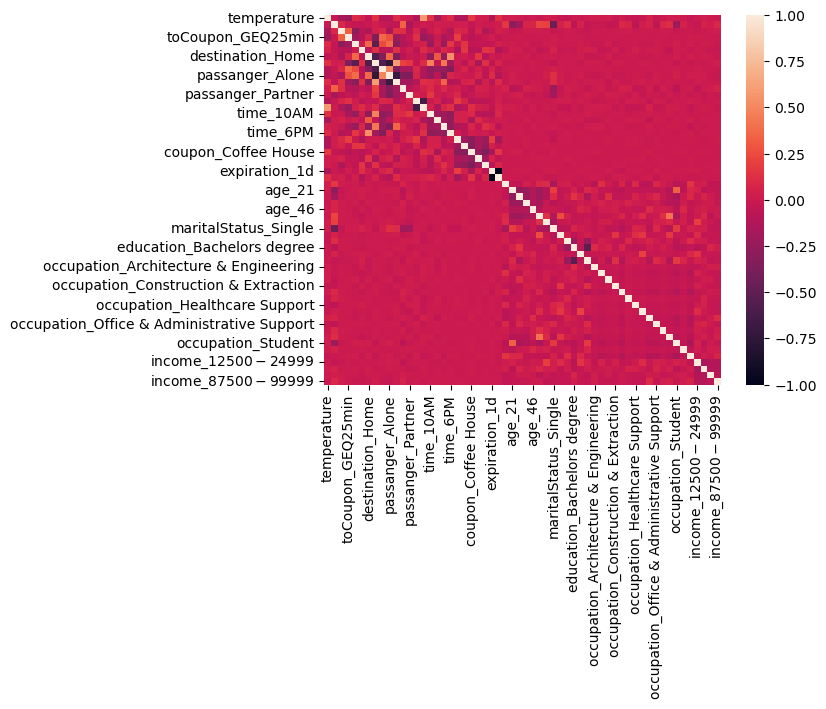

In [28]:
sns.heatmap(data3.corr())

100%|██████████| 1000/1000 [00:00<00:00, 2016.32it/s]


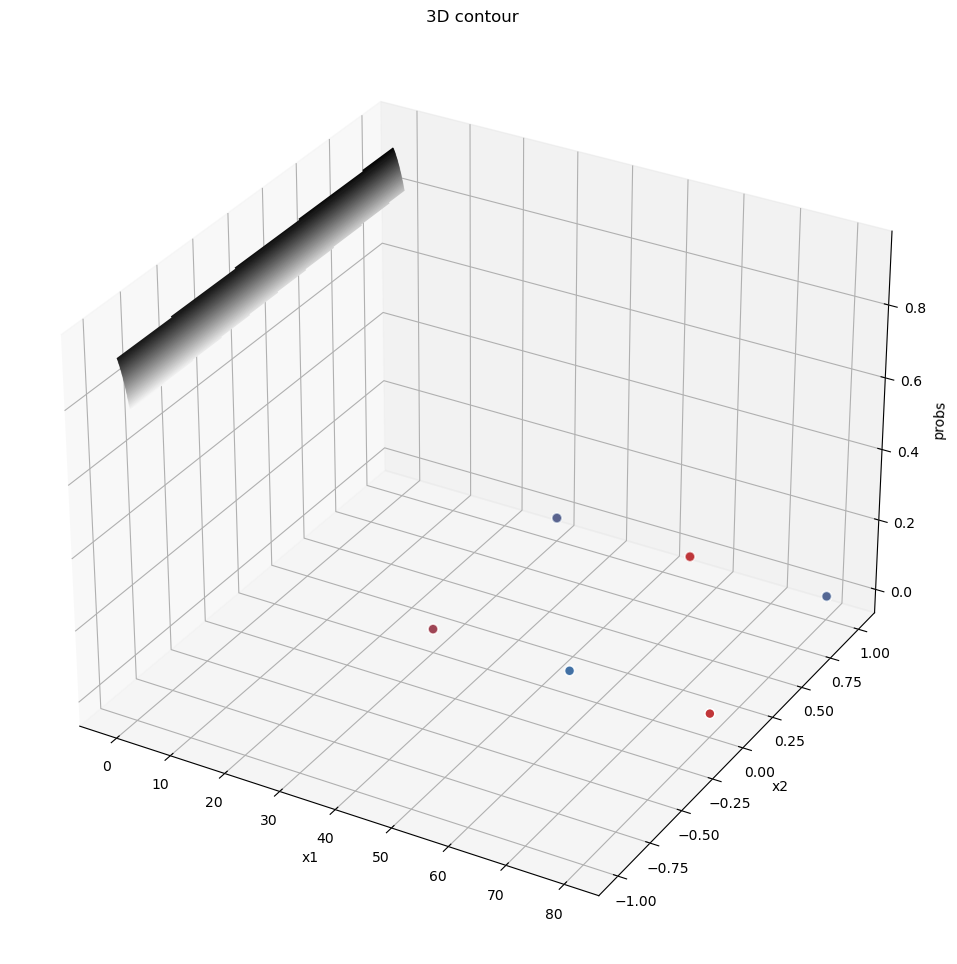

C:\Users\Uday Sujith\AppData\Local\Temp\ipykernel_36240\3308172566.py:132: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


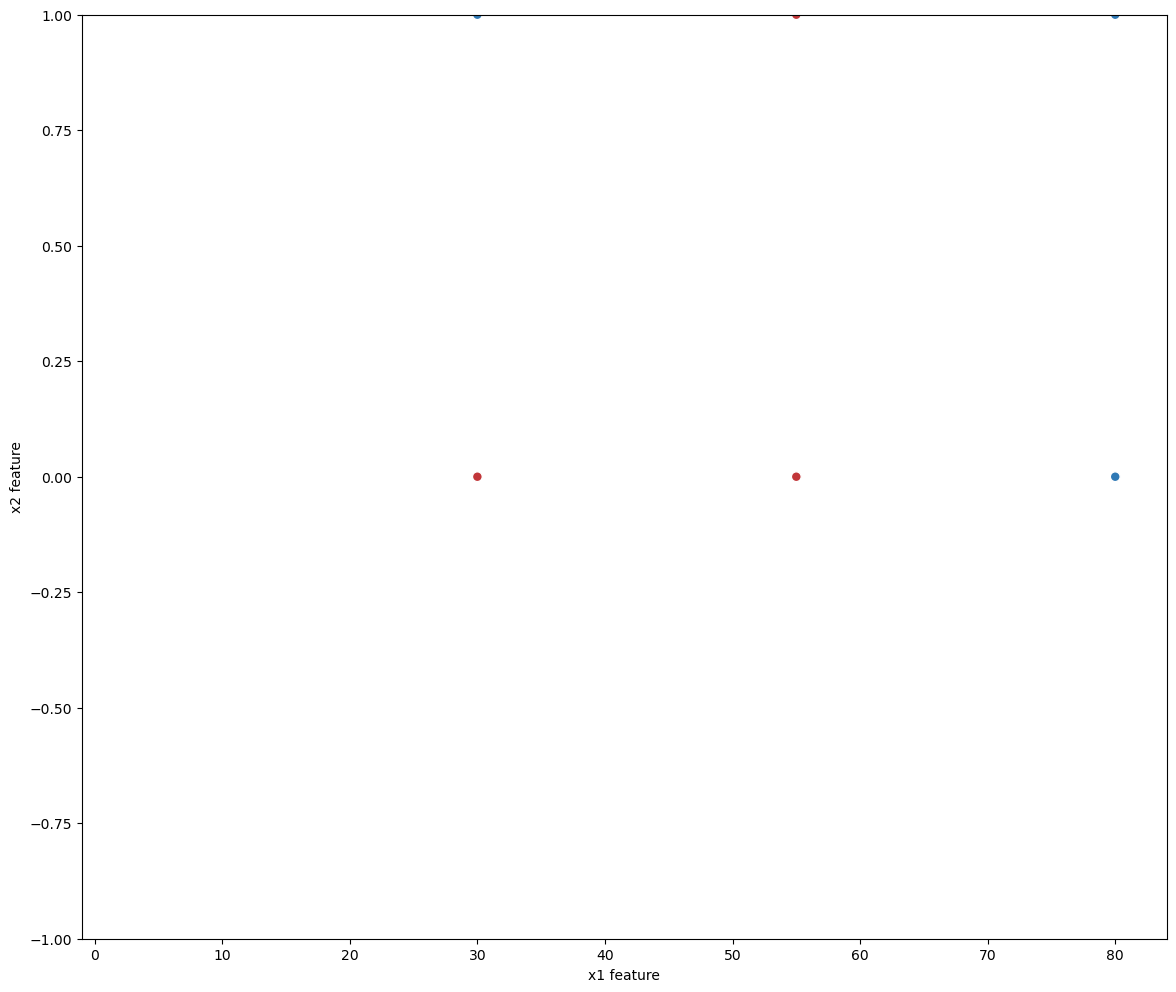

accuracy % is 56.986666666666665


array([[ 677,  999],
       [ 614, 1460]], dtype=int64)

In [99]:
import numpy as np
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)
lr= LogisticRegression(X_train,y_train, learningrate=0.001, max_iterations=1000, epsilon=0.0005, remove_index=None,reg_lambda=0.1,method="Lasso")
lr.fit()
lr.plot_3d()
lr.scatter_plot()
def add_X0(X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
def normalize_train(X):
        mean=np.mean(X,axis=0)
        std=np.std(X,axis=0)
        X=(X-mean)/std
        X=add_X0(X)
        return X,mean,std
def normalize_test(X,mean,std):
        X=(X-mean)/std
        X=add_X0(X)
        return X

def sigmoid(X,theta):
        
        z = X.dot(theta)
        
        # Compute the sigmoid function
        sigmoid_result = 1 / (1 + np.exp(-z))
        prediction=np.where(sigmoid_result>=0.5,1,0)
        return prediction

X_train,mean,std=normalize_train(X_train)
X_test=normalize_test(X_test,mean,std)


l=pd.DataFrame()
l["test"]=sigmoid(X_test,lr.theta)
l["actual"]=y_test
l["result"]=l["test"]-l["actual"]
print("accuracy % is "+str((len(l[l["result"]==0])/len(l["test"]))*100))
confusion_matrix(y_test,sigmoid(X_test,lr.theta))

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors


def visualize_svm(X, y, clf):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

    
    
    
colors = ['blue','red']
cmap = pltcolors.ListedColormap(colors)


def generateBatchBipolar(n, mu=0.5, sigma=0.2):
    """ Two gaussian clouds on each side of the origin """
    X = np.random.normal(mu, sigma, (n, 2))
    yB = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y = 2. * yB - 1
    X *= y[:, np.newaxis]
    X -= X.mean(axis=0)
    return X, y

def plotLine(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
    """ Plot a (separating) line given the normal vector (weights) and point of intercept """
    if type(x0) == int or type(x0) == float or type(x0) == np.float64:
        x0 = [0, -x0 / w[1]]
    yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
    ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)
    
    
def plotSvm(X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator', 
            ax=None, bound=[[-1., 1.], [-1., 1.]]):
    """ Plot the SVM separation, and margin """
    if ax is None:
        fig, ax = plt.subplots(1)
    
    im = ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, alpha=0.5, label=label)
    if support is not None:
        ax.scatter(support[:,0], support[:,1], label='Support', s=80, facecolors='none', 
                   edgecolors='y', color='y')
        print("Number of support vectors = %d" % (len(support)))
    if w is not None:
        xx = np.array(bound[0])
        plotLine(ax, xx, w, intercept, separatorLabel)
        # Plot margin
        if support is not None:
            signedDist = np.matmul(support, w)
            margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
            supportMaxNeg = support[np.argmin(signedDist)]
            plotLine(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
            supportMaxPos = support[np.argmax(signedDist)]
            plotLine(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
            ax.set_title('Margin = %.3f' % (margin))
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_xlim(bound[0])
    ax.set_ylim(bound[1])
    cb = plt.colorbar(im, ax=ax)
    loc = np.arange(-1,1,1)
    cb.set_ticks(loc)
    cb.set_ticklabels(['-1','1'])

In [44]:
@dataclass
class svm:
    lambda_param:float
    lr:float
    max_iteration:int
    
    def fit(self,X,y):
        N,n_features = X.shape
        self.w=np.ones(n_features)
        self.b=0
        y_=np.where(y<=0,-1,1)
        for i in tqdm(range(self.max_iteration), colour='blue'):
            for idx, x_i in enumerate(X):
                condition=(y_[idx]*(np.matmul(x_i,self.w)+self.b))>=1
                if condition:
                    self.w-= 2 * self.lr *self.lambda_param*self.w
                else:
                    self.w-=  self.lr*(2*self.lambda_param*self.w - np.dot(x_i,y_[idx]))
                    self.b-= -y_[idx]

In [45]:
sv=svm(lr=0.0001,max_iteration=500,lambda_param=0.001)

In [46]:

import numpy as np
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)
def normalize_train(X):
        mean=np.mean(X,axis=0)
        std=np.std(X,axis=0)
        X=(X-mean)/std
        return X,mean,std
def normalize_test(X,mean,std):
        X=(X-mean)/std
        return X
X_train,mean,std=normalize_train(X_train)
sv.fit(X_train[:300],y_train[:300])
X_test=normalize_test(X_test,mean,std)
t=np.where((sv.w.dot(X_test.T)+sv.b)>0,1,0)
l=pd.DataFrame()
l["test"]=t
l["actual"]=y_test
l["result"]=l["test"]-l["actual"]
print("accuracy % is "+str((len(l[l["result"]==0])/len(l["test"]))*100))
confusion_matrix(y_test,t)

100%|██████████| 500/500 [00:00<00:00, 562.17it/s]


accuracy % is 55.14666666666667


array([[ 565, 1111],
       [ 571, 1503]], dtype=int64)

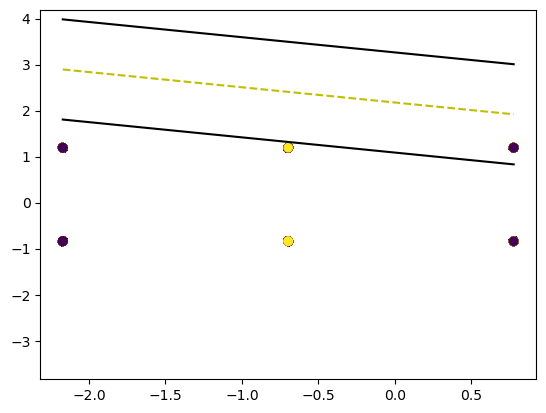

In [57]:
visualize_svm(X_test,y_test,sv)

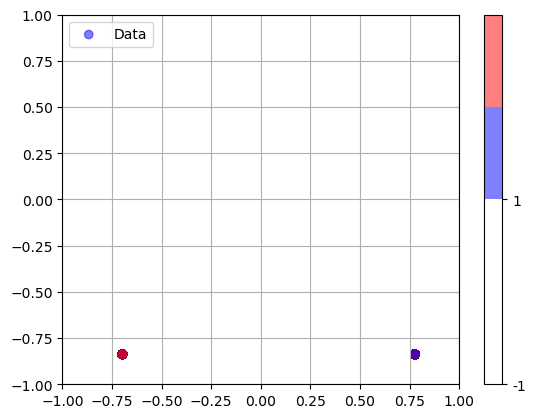

In [58]:
plotSvm(X_test,y_test)

In [49]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
@dataclass
class SoftMarginVSM:
    C:float
    def dualSVM(self,gramXy,alphas):
        return alphas.sum()-0.5*alphas.dot(alphas.dot(gramXy))
    def jacobian_dualSVM(self,gramXy,alphas):
        return np.ones(len(alphas))-alphas.dot(gramXy)
    def fit(self,X,y):
        N,n_features=X.shape
        y_=np.where(y<=0,-1,1)
        Xy=X*(y_[:,np.newaxis])
        gramXy=Xy.dot(Xy.T)
        alphas=np.ones(N)
        bounds=Bounds(np.zeros(N),np.full(N,self.C))
        constraints = ({"type":"eq","fun":lambda a:-np.dot(a,y_),"jac":lambda a:-y_})
        slsqp = minimize(fun=lambda a : self.dualSVM(gramXy,a),x0=alphas,
                         jac=lambda a : self.jacobian_dualSVM(gramXy,a),
                         bounds=bounds,constraints=constraints,
                         method="SLSQP")
        self.alphas=slsqp.x
        self.w=self.alphas[:np.newaxis].dot(Xy)
        epsilon=1e-6
        self.support_vectors=X[self.alphas>epsilon]
        signdist=(self.support_vectors).dot(self.w.T)
        mindlist=np.argmin(signdist)
        support_labels=y_[self.alphas>epsilon]
        self.b=support_labels[mindlist]-signdist[mindlist]

In [50]:
model= SoftMarginVSM(C=100)

In [51]:

import numpy as np
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)
def normalize_train(X):
        mean=np.mean(X,axis=0)
        std=np.std(X,axis=0)
        X=(X-mean)/std
        return X,mean,std
def normalize_test(X,mean,std):
        X=(X-mean)/std
        return X
X_train,mean,std=normalize_train(X_train)
model.fit(X_train[:300],y_train[:300])
X_test=normalize_test(X_test,mean,std)
t=np.where((model.w.dot(X_test.T)+model.b)>0,1,0)
l=pd.DataFrame()
l["test"]=t
l["actual"]=y_test
l["result"]=l["test"]-l["actual"]
print("accuracy % is "+str((len(l[l["result"]==0])/len(l["test"]))*100))
confusion_matrix(y_test,t)

accuracy % is 55.30666666666667


array([[   0, 1676],
       [   0, 2074]], dtype=int64)

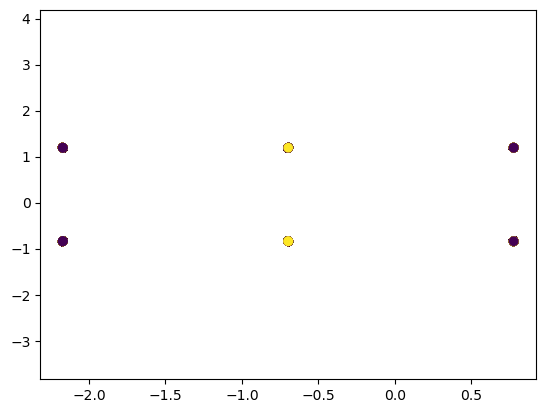

In [59]:
visualize_svm(X_test,y_test,model)

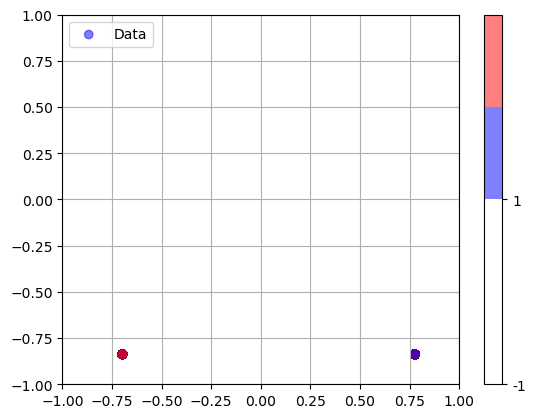

In [60]:
plotSvm(X_test,y_test)

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from scipy.stats import norm
class NaiveNaiveBayes:
    
    def __init__(self,X,y,gausian=True,laplace=True,smoothening_factor=1):
        self.X=X
        self.y=y
        self.gausian=gausian
        self.laplace=laplace
        self.smoothening_factor=smoothening_factor
    def dataSplit(self):
        X_train, X_test, y_train , y_test = train_test_split(self.X,self.y,test_size = 0.3,shuffle=False)
        return X_train, X_test, y_train , y_test
    def fitDistribution(self,X):
        mean =np.mean(X)
        std=np.std(X)
        dist=norm(mean,std)
        return dist
    def posterior(self,x,dist1,dist2,prior):
        return prior*dist1.pdf(x[0])*dist2.pdf(x[1])
    def laplace_smoothening(self,x,Xkj,prior): # laplace smoothening
        generative_probability=prior
        for i,dim in enumerate(x):
            generative_probability=generative_probability*((len(Xkj[Xkj[list(Xkj.columns)[i]]==x[i]]))+self.smoothening_factor)/(len(Xkj)+2*self.smoothening_factor)
        return generative_probability
               
    def no_smoothening(self,x,Xkj,prior):
        generative_probability=prior
        for i,dim in enumerate(x):
            generative_probability=generative_probability*(len(Xkj[Xkj[list(Xkj.columns)[i]]==x[i]]))
        return generative_probability
    
    def accuracy(self):
        l=pd.DataFrame()
        l["test"]=self.test_prediction
        l["actual"]=self.actual_value
        l["result"]=l["test"]-l["actual"]
        print("accuracy % is "+str((len(l[l["result"]==0])/len(l["test"]))*100))
               
        
             
    def fit(self):
        X_train, X_test, y_train , y_test = self.dataSplit()
        X0=X_train[y_train==0]
        X1=X_train[y_train==1]
        prior_0=X0.shape[0]/X_train.shape[0]
        prior_1=X1.shape[0]/X_train.shape[0]
        dist_X00 = self.fitDistribution(X0[:,0])
        dist_X01 = self.fitDistribution(X0[:,1])
        dist_X10 = self.fitDistribution(X1[:,0])
        dist_X11 = self.fitDistribution(X1[:,1])
        self.test_prediction=[]
        self.actual_value=[]
        for rec,y in zip(X_test,y_test):
            self.actual_value.append(y)
            if not self.gausian and self.laplace:
                
                columnNames=[]
                for i,invi in enumerate(X_train[0]):
                    columnNames.append("x"+str(i))    
                p_y0=self.laplace_smoothening(rec,pd.DataFrame(X0,columns=columnNames),prior_0)
                p_y1=self.laplace_smoothening(rec,pd.DataFrame(X1,columns=columnNames),prior_1)
                self.test_prediction.append(np.argmax([p_y0,p_y1]))
            elif not self.gausian and not self.laplace:
                columnNames=[]
                for i,invi in X_train[0]:
                    columnNames.append("x"+str(i))
               
                p_y0=self.no_smoothening(rec,pd.DataFrame(X0,columns=columnNames),prior_0)
                p_y1=self.no_smoothening(rec,pd.DataFrame(X1,columns=columnNames),prior_1)
                self.test_prediction.append(np.argmax([p_y0,p_y1]))
            else:
                
                p_y0 = self.posterior(rec,dist_X00,dist_X01,prior_0)
                p_y1 = self.posterior(rec,dist_X10,dist_X01,prior_1)
                self.test_prediction.append(np.argmax([p_y0,p_y1]))
            

In [62]:
Nb=NaiveNaiveBayes(X,y,gausian=False,laplace=True,smoothening_factor=1)
Nb.fit()
l=pd.DataFrame()
l["test"]=Nb.test_prediction
l["actual"]=y_test
l["result"]=l["test"]-l["actual"]
print("accuracy % is "+str((len(l[l["result"]==0])/len(l["test"]))*100))
confusion_matrix(y_test,Nb.test_prediction)

accuracy % is 64.34666666666666


array([[1096,  580],
       [ 757, 1317]], dtype=int64)

In [59]:
#K Means
class Kmeans:
    def __init__(self,X,k,max_iterations):
        self.X=X
        self.k=k
        self.max_iterations=max_iterations
        self.list_of_classifictations=[]
        self.predictions=[]
    def euclidiean(self,x,y):
        dist=0
        x=np.array(x)
        y=np.array(y)
        for i,dim in enumerate(x):
            dist=dist+(x[i]-y[i])**2
        return dist**0.5
    
        
    def fit(self):
        list_of_Cs=[]
        self.list_of_classifictations=[]
        for x in np.arange(0,self.k,1):
            list_of_Cs.append(self.X[x])
        for ite in np.arange(0,self.max_iterations,1):
            self.predictions=[]
            for row in self.X:
                index=0
                dist=self.euclidiean(row,list_of_Cs[0])
                for i,c in enumerate(list_of_Cs):
                    if dist>self.euclidiean(row,c):
                        dist=self.euclidiean(row,c)
                        index=i
                indi=list(row)
                indi.append(index+1)
                self.list_of_classifictations.append(indi)
                self.predictions.append(index)
            for i,c in enumerate(list_of_Cs):
                list_x=[]
                for x in self.list_of_classifictations:
                    if x[len(x)-1]==i+1:
                        list_x.append(x[:len(x)-1])
                list_of_Cs[i]=np.mean(np.array(list_x),axis=0)
        
        

In [60]:
ki=Kmeans(X,2,1)

In [70]:
ki.fit()

In [106]:
import numpy as np

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3,shuffle=False)
    
def normalize_train(X):
        mean=np.mean(X,axis=0)
        std=np.std(X,axis=0)
        X=(X-mean)/std
        return X,mean,std

X_test,mean,std=normalize_train(X_test)
ki=Kmeans(X_test,2,10)
ki.fit()

l=pd.DataFrame()
l["test"]=ki.predictions
l["actual"]=y_test
l["result"]=l["test"]-l["actual"]
print("accuracy % is "+str((len(l[l["result"]==0])/len(l["test"]))*100))

accuracy % is 47.78666666666667


In [107]:
confusion_matrix(y_test,Nb.test_prediction)

array([[1096,  580],
       [ 757, 1317]], dtype=int64)

<AxesSubplot:>

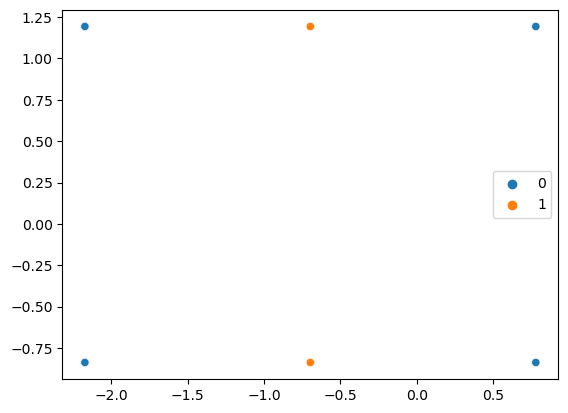

In [109]:
import seaborn as sns
sns.scatterplot(x=X_test[:, 1],y=X_test[:,2],hue=y_test)

In [104]:
X_test[:, 1]

array([ 0.7769447 , -2.17113253, -0.69709392, ..., -2.17113253,
       -2.17113253,  0.7769447 ])